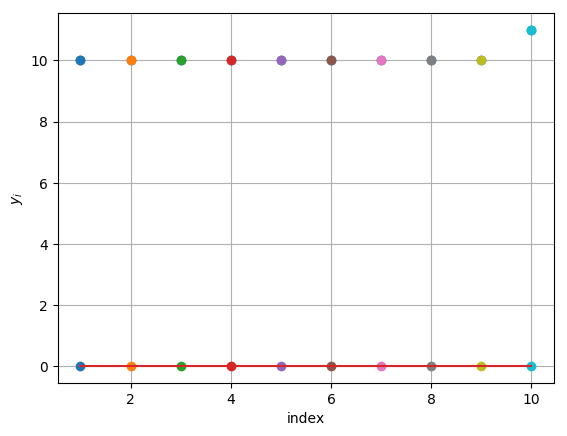

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [1]:
using Convex, ECOS, PyPlot

n = 10;

b1 = ones(n);
y = 10*copy(b1);
y[n] = 11;

figure();
grid("on");
stem(1:n, y, "o");
xlabel("index");
ylabel(L"y_i");


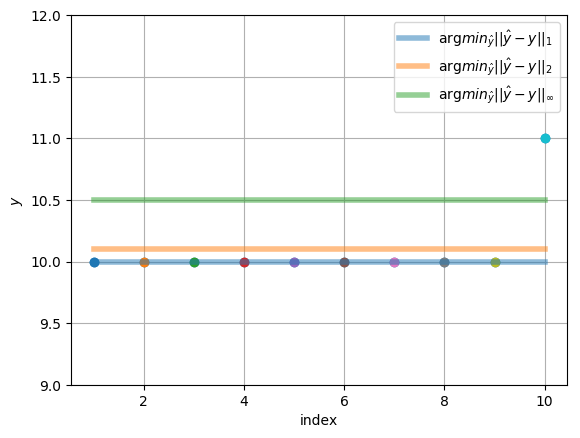

yhat_1norm: 10.0000
yhat_2norm: 10.1000
yhat_infty: 10.5000

ECOS 2.0.5 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -0.000e+00  +1e+01  2e-01  7e-05  1e+00  6e+00    ---    ---    1  1  - |  -  - 
 1  +1.392e-01  +1.413e-01  +9e-01  1e-02  6e-06  8e-02  5e-01  0.9221  4e-04   2  2  2 |  0  0
 2  +9.145e-01  +9.406e-01  +8e-02  1e-03  5e-07  3e-02  6e-02  0.9498  7e-02   2  2  2 |  0  0
 3  +9.483e-01  +9.486e-01  +9e-04  2e-05  5e-09  4e-04  6e-04  0.9890  1e-04   2  2  2 |  0  0
 4  +9.487e-01  +9.487e-01  +9e-06  2e-07  6e-11  4e-06  7e-06  0.9890  1e-04   2  1  1 |  0  0
 5  +9.487e-01  +9.487e-01  +1e-07  2e-09  7e-13  5e-08  8e-08  0.9890  1e-04   2  1  1 |  0  0
 6  +9.487e-01  +9.487e-01  +1e-09  2e-11  8e-15  5e-10  8e-10  0.9890  1e-04   2  1  1 |  0  0

OPTIMAL (within feastol=2.3e-11, reltol=1.2e-09, abstol=1.2e-09).
Runtime: 0.0001

In [2]:
yhat = Variable(1);

loss_2norm = norm(yhat-y, 2);
loss_1norm = norm(yhat-y, 1);
loss_infty = norm(yhat-y, Inf);

problem = minimize(loss_2norm);
solve!(problem);
yhat_2norm = evaluate(yhat);

problem = minimize(loss_1norm);
solve!(problem);
yhat_1norm = evaluate(yhat);

problem = minimize(loss_infty);
solve!(problem);
yhat_infty = evaluate(yhat);

figure();
grid("on");
stem(1:n, y, "o");
plot(1:n, yhat_1norm*b1, linewidth=4.0, alpha=0.5, label=L"\argmin_\hat{y} ||\hat{y}-y||_1");
plot(1:n, yhat_2norm*b1, linewidth=4.0, alpha=0.5, label=L"\argmin_\hat{y} ||\hat{y}-y||_2");
plot(1:n, yhat_infty*b1, linewidth=4.0, alpha=0.5, label=L"\argmin_\hat{y} ||\hat{y}-y||_\infty");
xlabel("index");
ylabel(L"y");
ylim(9, 12);
legend();

println(@sprintf("yhat_1norm: %7.4f",yhat_1norm));
println(@sprintf("yhat_2norm: %7.4f",yhat_2norm));
println(@sprintf("yhat_infty: %7.4f",yhat_infty));
